<h1><center>Sales Prediction using Python</center></h1>.

#### *In this **Sales Prediction** project, the goal is to predict how much of a product will be sold based on advertising spend across different media platforms (TV, Radio, and Newspaper).*
#### *By using machine learning techniques, we aim to analyze how these factors influence sales and build a model that accurately forecasts future sales. This is crucial for businesses to optimize their advertising budget and maximize revenue.*
**The project involves data analysis, model building, and performance evaluation to provide insights for effective decision-making in marketing strategies.**

**How can we predict future product sales based on advertising spend across different platforms such as TV, Radio, and Newspaper to help businesses optimize their marketing strategies?**


In [41]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')



### Load the Dataset into Pandas dataframe

In [42]:
data = pd.read_csv("Advertising.csv")
type(data)

pandas.core.frame.DataFrame

In [43]:
# Display the first 5 records of the dataset
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Data Exploration

In [44]:
# Drop the 'Unnamed: 0' column as it is not requried for Analysis
data.drop('Unnamed: 0', axis=1, inplace=True)

# Display the first 5 records of the dataset
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
# Display the shape of the Dataframe
data.shape

(200, 4)

In [46]:
# Display information about the datatype of each column and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Basic Descriptive Statistics:

In [47]:
# Display the summary statistics of the dataset
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Check for Missing Values:

In [48]:
# Checking for null Values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### **Correlation Matrix**
  A Correlation matrix is a table showing correlation coefficients between variables.

In [49]:
# Display the correlation matrix of the dataset
data.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## **Data Visualization**

#### **Correlation Heatmap:**

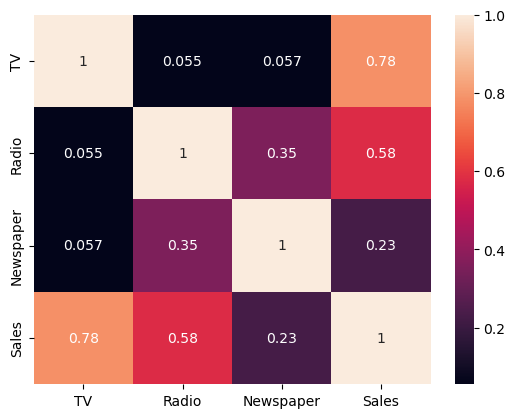

In [50]:
# Plotting the correlation matrix using seaborn
sns.heatmap(data.corr(), annot=True)
plt.show()



#### **Pairplot with Regression Lines:**
*Scatter plot to check the Linearity assumption between each independent variable (TV, Radio, Newspaper) and the Dependent variable(sales)*

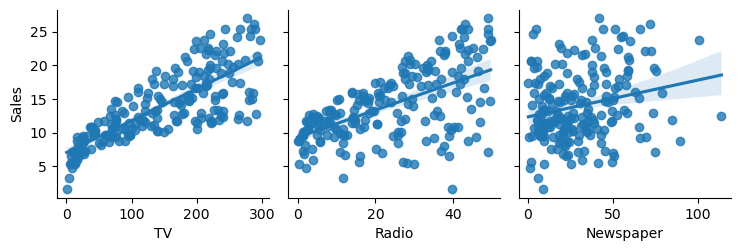

In [51]:
# We will use the scatter plot to check the linearity assumption

sns.pairplot(data= data, x_vars=['TV','Radio', 'Newspaper'], y_vars='Sales',kind='reg',  palette='coolwarm')
plt.show()
# The scatter plot shows a linear relationship between each independent variable and the dependent variable, which satisfies the linearity assumption




#### **Visualize Data Distribution:**

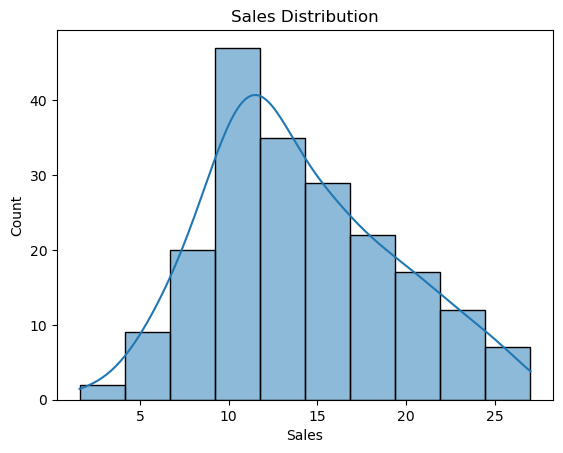

In [52]:
# Sales Distribution
sns.histplot(data['Sales'], bins=10, kde=True)
plt.title('Sales Distribution')
plt.show()


##### *The distribution is approximately normal, with a peak (mode) around 10-12 sales.*
##### *The histogram shows that the sales data is normally distributed, which satisfies the normality assumption*


 ## Prepare Data for Modeling
 **Define 'features' and 'target' variable:**

In [53]:
X = data[['TV', 'Radio', 'Newspaper']]  # Features (Advertising spend)
y = data['Sales']  # Target variable (Sales)


## Split Data into Training and Test Sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train a Linear Regression Model

In [55]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]


##  Make Predictions

In [56]:
# Predict sales on the test set
y_pred = model.predict(X_test)


## Evaluate the Model
**1- Mean Squared Error (MSE):**

In [57]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.1740973539761046


**2- R-squared Score:**

In [58]:
r2 = r2_score(y_test, y_pred)*100
print(f'R-squared: {r2}')


R-squared: 89.9438024100912


## Visualize Predictions vs Actual Sales

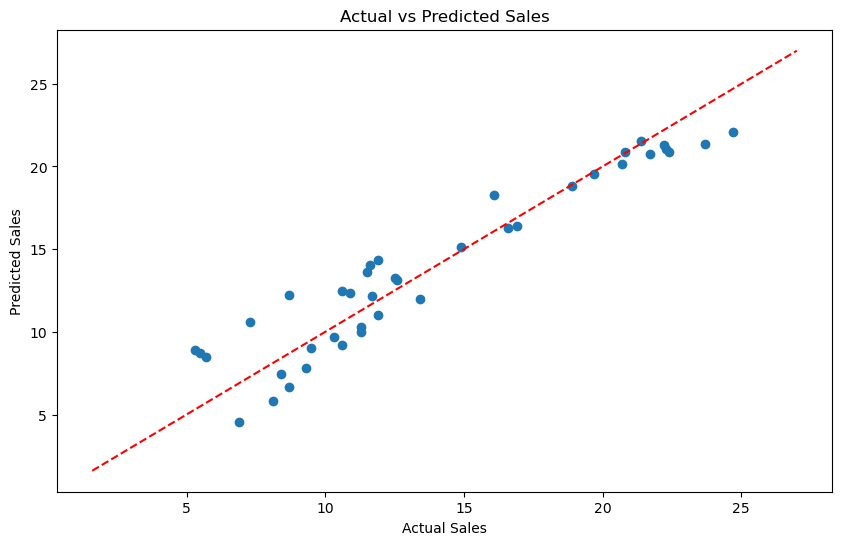

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


**- The closer the points are to the red dashed line, the more accurate the predictions are. Points above the line indicate that the model over-predicted sales, while points below the line indicate that the model under-predicted sales.**

**- From the plot, we can observe that most points are clustered around the red line, indicating a relatively good fit of the model.**

## Feature Importance
**We can check which feature contributes the most to sales by looking at the coefficients:**

In [60]:
feature_importance = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Coefficient': model.coef_
})

print(feature_importance)


     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


## Conclusion:
**- The analysis suggests that 'TV and Radio advertising' significantly impact sales, while Newspaper advertising is not as effective.**

**- The model is a good fit, explaining almost *90% of the variability in sales*.**

**- TV and Radio ads have the most significant impact on sales, with TV being the strongest predictor.**

**- Newspaper ads have little to no effect on sales.**

**- The model explains *89.94% of the variance in sales*, meaning it’s a strong predictor.**

**- The *Mean Squared Error (MSE) of 3.17* shows moderate prediction error.**

**- Intercept is *2.98*, meaning baseline sales without any advertising would be around 2.98 units.**

**- Overall, TV and Radio are the key drivers for predicting sales, while Newspaper advertising is negligible.**